### Today, we are going to work on a simple dataset which we have collected from Kaggle community.

In [ ]:
# So, first step is importing neccesary libraries and import dataset from our local drive 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings #(we are doing this to simply ignore the warnings that may occur in dataset)
warnings.filterwarnings('ignore')

In [ ]:
store = pd.read_csv(r'/content/Global_superstore.csv',encoding='Latin1') 
# Here, we were facing an enoding problem so that's why we used enocoding code. 

In [ ]:
store.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,7/31/2012,7/31/2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2/5/2013,2/7/2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical


In [ ]:
store.shape

(51290, 24)

In [ ]:
store.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [ ]:
store.describe(include='all')

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
count,51290.00000,51290,51290,51290,51290,51290,51290,51290,51290,51290,...,51290,51290,51290,51290,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290
unique,NaN,25035,1430,1464,4,1590,795,3,3636,1094,...,10292,3,17,3788,NaN,NaN,NaN,NaN,NaN,4
top,NaN,CA-2014-100111,6/18/2014,11/22/2014,Standard Class,PO-18850,Muhammed Yedwab,Consumer,New York City,California,...,OFF-AR-10003651,Office Supplies,Binders,Staples,NaN,NaN,NaN,NaN,NaN,Medium
freq,NaN,14,135,130,30775,97,108,26518,915,2001,...,35,31273,6152,227,NaN,NaN,NaN,NaN,NaN,29433
mean,25645.50000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,246.490581,3.476545,0.142908,28.610982,26.375818,NaN
std,14806.29199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,487.565361,2.278766,0.212280,174.340972,57.296810,NaN
min,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000,0.002000,NaN
25%,12823.25000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,30.758625,2.000000,0.000000,0.000000,2.610000,NaN
50%,25645.50000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,85.053000,3.000000,0.000000,9.240000,7.790000,NaN
75%,38467.75000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,251.053200,5.000000,0.200000,36.810000,24.450000,NaN


In [ ]:
store.nunique()

Row ID            40349
Order ID          21950
Order Date         1422
Ship Date          1464
Ship Mode             4
Customer ID        1587
Customer Name       795
Segment               3
City               3510
State              1072
Country             147
Postal Code         590
Market                8
Region               13
Product ID         9651
Category              3
Sub-Category         17
Product Name       3563
Sales             20375
Quantity             14
Discount             27
Profit            20882
Shipping Cost     15494
Order Priority        4
dtype: int64

In [ ]:
# we find some columns necessary for our analysis and visualization so we are dropping these columns.
store=store.drop(['Row ID','Order ID','Customer ID','Postal Code','Product ID'],axis=1)


In [ ]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40349 entries, 0 to 40348
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order Date      40349 non-null  object 
 1   Ship Date       40349 non-null  object 
 2   Ship Mode       40349 non-null  object 
 3   Customer Name   40349 non-null  object 
 4   Segment         40349 non-null  object 
 5   City            40349 non-null  object 
 6   State           40349 non-null  object 
 7   Country         40349 non-null  object 
 8   Market          40349 non-null  object 
 9   Region          40348 non-null  object 
 10  Category        40348 non-null  object 
 11  Sub-Category    40348 non-null  object 
 12  Product Name    40348 non-null  object 
 13  Sales           40348 non-null  float64
 14  Quantity        40348 non-null  float64
 15  Discount        40348 non-null  float64
 16  Profit          40348 non-null  float64
 17  Shipping Cost   40348 non-null 

In [ ]:
store['Discount'].head()
# From here we find that discount is somewhat looking different to understand properly. 
# So we are going to make discount in an understandable form.

0    0.0
1    0.1
2    0.1
3    0.1
4    0.0
Name: Discount, dtype: float64

In [ ]:
store['Discount']=(store['Discount']*100)

In [ ]:
store['Discount']
# Here , we multiplied discount column by 100. 

0         0.0
1        10.0
2        10.0
3        10.0
4         0.0
         ... 
40344     0.0
40345    50.0
40346    10.0
40347     0.0
40348     NaN
Name: Discount, Length: 40349, dtype: float64

In [ ]:
store.isna().sum()
# There is no null value 


Order Date        0
Ship Date         0
Ship Mode         0
Customer Name     0
Segment           0
City              0
State             0
Country           0
Market            0
Region            1
Category          1
Sub-Category      1
Product Name      1
Sales             1
Quantity          1
Discount          1
Profit            1
Shipping Cost     1
Order Priority    1
dtype: int64

In [ ]:
store.duplicated().sum()
# Also, this dataset has no duplicate value 

0

In [ ]:
# Knowing about no of unique values in the column 
ship_mode = store['Ship Mode'].value_counts()
ship_mode

Standard Class    23122
Second Class       8409
First Class        6466
Same Day           2352
Name: Ship Mode, dtype: int64

In [ ]:
# Knowing about no of unique values in the column
segment = store['Segment'].value_counts()
segment

Consumer       20877
Corporate      12130
Home Office     7342
Name: Segment, dtype: int64

In [ ]:
# Knowing about no of unique values in the column
city = store['City'].value_counts()
city.head(5)

New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Santo Domingo    443
Name: City, dtype: int64

In [ ]:
City_less_than100=city[city<100]
City_less_than100

Newark                        95
Geelong                       94
Richmond                      94
Izmir                         93
Santiago de los Caballeros    93
                              ..
Vesoul                         1
Várzea Grande                  1
Luanshya                       1
Kissimmee                      1
Victoria Falls                 1
Name: City, Length: 3561, dtype: int64

In [ ]:
def handle_City(value):
    if (value in City_less_than100):
        pass
    else:
        return value
        
store['City'] = store['City'].apply(handle_City)
store['City'].value_counts()

New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Santo Domingo    443
                ... 
Bogotá           102
Guadalajara      102
Marseille        102
Bandung          101
Ankara           100
Name: City, Length: 75, dtype: int64

In [ ]:
# Cleaning the State column
State = store['State'].value_counts(ascending  = False)
State_less_than300=State[State<300]

def handle_State(value):
    if(value in State_less_than300):
        pass
    else:
        return value
        
store['State'] = store['State'].apply(handle_State)
store['State'].value_counts()

California                    1405
England                       1308
Ile-de-France                  873
New York                       799
New South Wales                673
North Rhine-Westphalia         645
Queensland                     608
Texas                          569
San Salvador                   510
National Capital               477
Victoria                       443
Distrito Federal               388
Pennsylvania                   361
Santo Domingo                  356
Provence-Alpes-Côte d'Azur     353
Washington                     345
São Paulo                      343
Guatemala                      329
Ohio                           306
Name: State, dtype: int64

In [ ]:
# Cleaning the country column
Country = store['Country'].value_counts()
Country_less_than400=Country[Country<400]

def handle_Country(value):
    if(value in Country_less_than400):
        return 'others'
    else:
        return value
        
store['Country'] = store['Country'].apply(handle_Country)
store['Country'].value_counts().head()

others           10816
United States     9994
Australia         2837
France            2827
Mexico            2644
Name: Country, dtype: int64

In [ ]:
# Cleaning the region column 
Region = store['Region'].value_counts(ascending  = False)
Region_less_than100=Region[Region<100]

def handle_Region(value):
    if(value in Region_less_than100):
        return 'others'
    else:
        return value
        
store['Region'] = store['Region'].apply(handle_Region)
store['Region'].value_counts().head()

Central    8904
South      5333
North      4020
EMEA       3532
Africa     3249
Name: Region, dtype: int64

In [ ]:
# Cleaning the Market column 
Market = store['Market'].value_counts()
Market.head()

APAC     9502
EU       8817
LATAM    8255
US       6701
EMEA     3532
Name: Market, dtype: int64

In [ ]:
# Cleaning the Category Column 
Category = store['Category'].value_counts()
Category

Office Supplies    21519
Technology          9698
Furniture           9131
Name: Category, dtype: int64

In [ ]:
# Renaming the Sub Category column 
store.rename(columns = {'Sub-Category':'Sub_Category'}, inplace = True)
store.head(2)



,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Country,Market,Region,Category,Sub_Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,7/31/2012,7/31/2012,Same Day,Rick Hansen,Consumer,New York City,New York,United States,US,East,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7.0,0.0,762.1845,933.57,Critical
1,2/5/2013,2/7/2013,Second Class,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,APAC,Oceania,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9.0,10.0,-288.7650,923.63,Critical


In [ ]:
Sub_Category = store['Sub_Category'].value_counts()
Sub_Category.head(3)

Storage    4374
Art        3489
Binders    3423
Name: Sub_Category, dtype: int64

In [ ]:
OrderPriority = store['Order Priority'].value_counts()
OrderPriority

Medium      21491
High        13174
Critical     3675
Low          2008
Name: Order Priority, dtype: int64

In [ ]:
# Now, we grouped the Sales and Profit by sub-category
Profit_Sales = store.groupby('Sub_Category')["Sales","Profit"]
Profit_Sales.first()


,Sales,Profit
Sub_Category,,
Accessories,2309.650,762.1845
Appliances,3701.520,1036.0800
Art,439.680,153.8400
Binders,5083.960,1906.4850
Bookcases,5667.870,2097.0300
Chairs,3709.395,-288.7650
Copiers,2832.960,311.5200
Envelopes,361.584,-16.1760
Fasteners,199.080,65.5200


In [ ]:
OrderPriority = store['Order Priority'].value_counts()
OrderPriority

Medium      21491
High        13174
Critical     3675
Low          2008
Name: Order Priority, dtype: int64

In [ ]:
# Grouping the Sales and Profit based on Sub_category
Profit_Sales = store.groupby('Sub_Category')["Sales","Profit"]
Profit_Sales.first()

,Sales,Profit
Sub_Category,,
Accessories,2309.650,762.1845
Appliances,3701.520,1036.0800
Art,439.680,153.8400
Binders,5083.960,1906.4850
Bookcases,5667.870,2097.0300
Chairs,3709.395,-288.7650
Copiers,2832.960,311.5200
Envelopes,361.584,-16.1760
Fasteners,199.080,65.5200


In [ ]:
Profit_Sales.sum()

,Sales,Profit
Sub_Category,,
Accessories,7.386779e+05,130238.74980
Appliances,1.006489e+06,142648.84360
Art,3.439002e+05,58179.07140
Binders,4.201972e+05,71836.03080
Bookcases,1.461295e+06,162172.85890
Chairs,1.493471e+06,140837.13770
Copiers,1.507196e+06,258265.28292
Envelopes,1.559485e+05,28971.59400
Fasteners,6.345294e+04,10447.91060


In [ ]:
store.head()

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Country,Market,Region,Category,Sub_Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,7/31/2012,7/31/2012,Same Day,Rick Hansen,Consumer,New York City,New York,United States,US,East,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7.0,0.0,762.1845,933.57,Critical
1,2/5/2013,2/7/2013,Second Class,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,APAC,Oceania,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9.0,10.0,-288.7650,923.63,Critical
2,10/17/2013,10/18/2013,First Class,Craig Reiter,Consumer,Brisbane,Queensland,Australia,APAC,Oceania,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9.0,10.0,919.9710,915.49,Medium
3,1/28/2013,1/30/2013,First Class,Katherine Murray,Home Office,Berlin,None,Germany,EU,Central,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5.0,10.0,-96.5400,910.16,Medium
4,11/5/2013,11/6/2013,Same Day,Rick Hansen,Consumer,None,None,others,Africa,Africa,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8.0,0.0,311.5200,903.04,Critical


In [ ]:
store.to_csv('store_cleaned.csv')

### It is time to analze the data

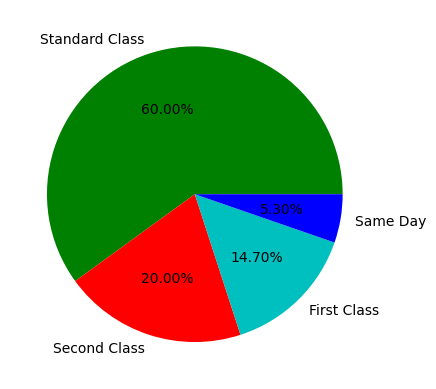

In [ ]:
# Percentage of ship mode via pie chart 

stu=['Standard Class','Second Class','First Class','Same Day']
colors=['g','r','c','b']
plt.pie([60,20,14.7,5.3],labels=stu,autopct="%0.2f%%",colors=colors)
plt.show()



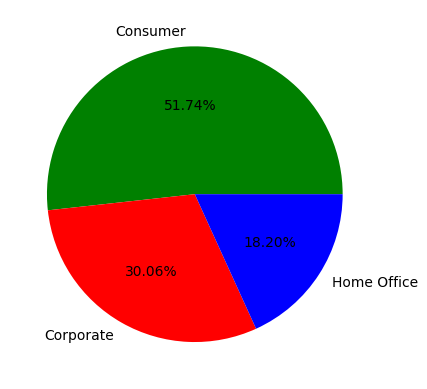

In [ ]:
# Pie chart of segment 

colors=['g','r','b']
plt.pie(x=segment,labels=segment.index,autopct="%0.2f%%",colors=colors)
plt.show()

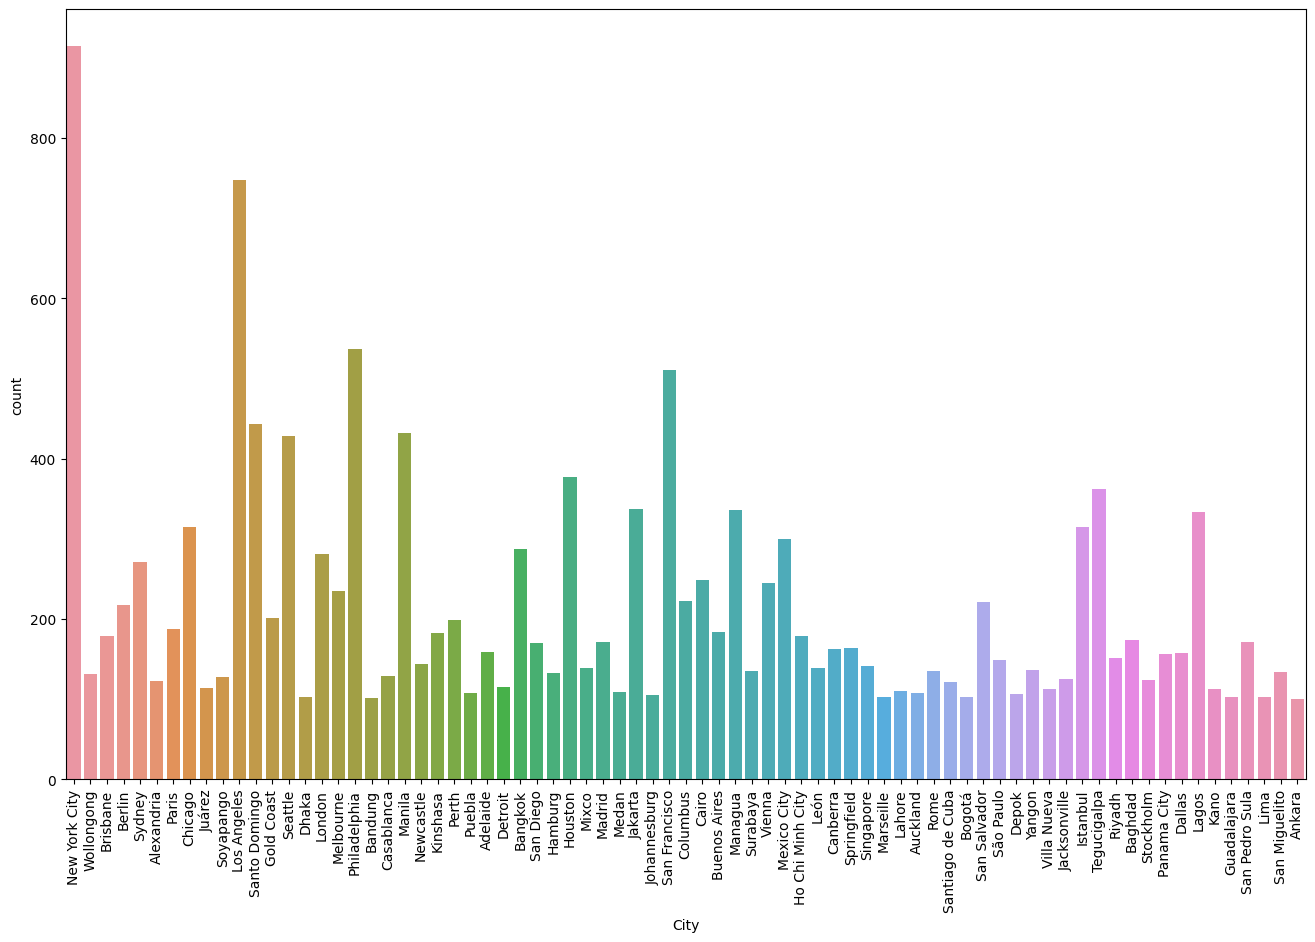

In [ ]:
# Visualizing the city 
plt.figure(figsize = (16,10))
ax = sns.countplot(x='City',data=store)
plt.xticks(rotation=90)
plt.show()

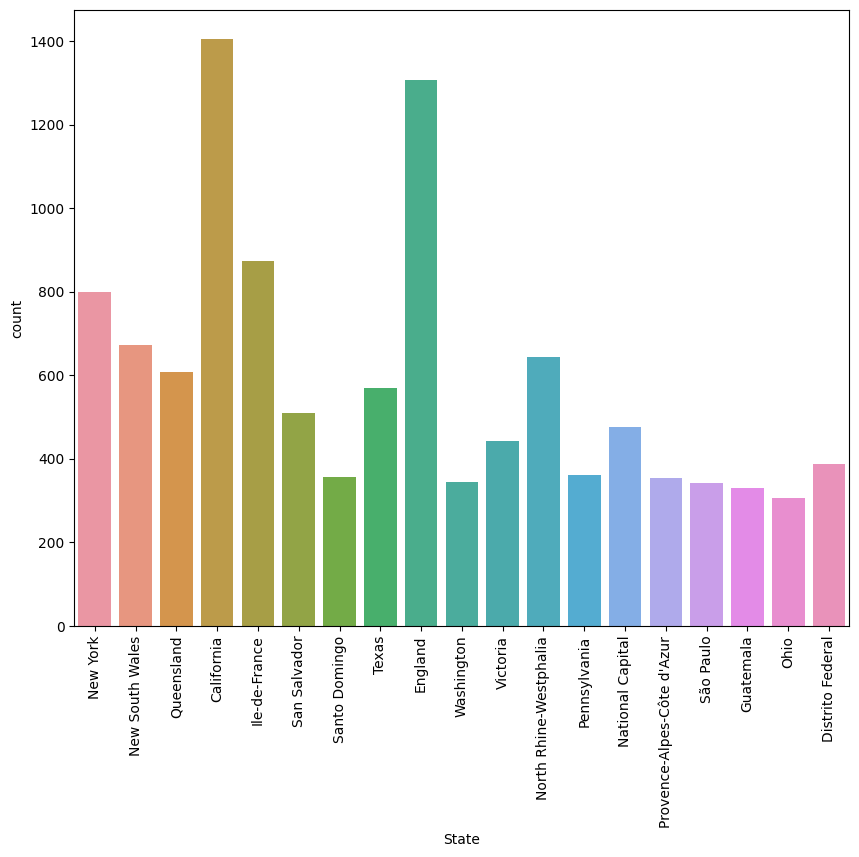

In [ ]:
# Visualizing the States
plt.figure(figsize = (10,8))
ax = sns.countplot(x='State',data=store)
plt.xticks(rotation=90)
plt.show()

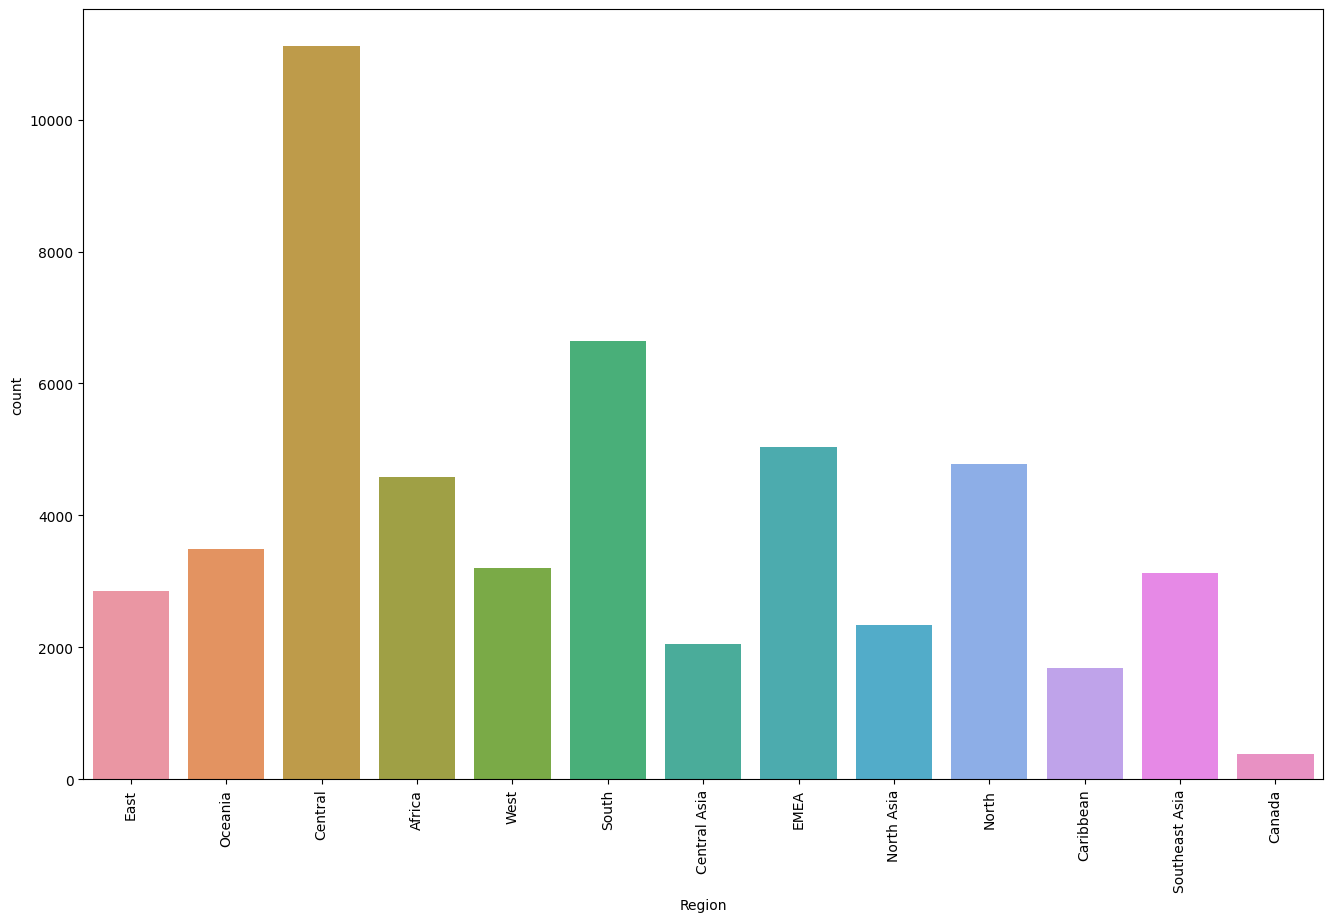

In [ ]:
# Visualizning the region
plt.figure(figsize = (16,10))
ax = sns.countplot(x='Region',data=store)
plt.xticks(rotation=90)
plt.show()

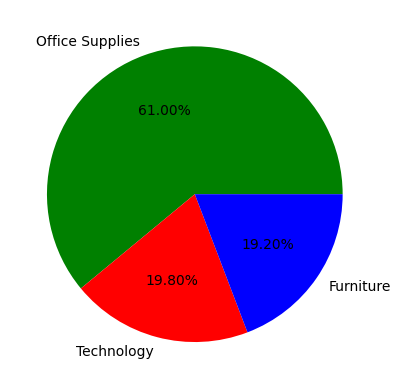

In [ ]:
# Visualizing the order Priority
stu=['Office Supplies','Technology','Furniture']
colors=['g','r','b']
plt.pie([61,19.8,19.2],labels=stu,autopct="%0.2f%%",colors=colors)
plt.show()

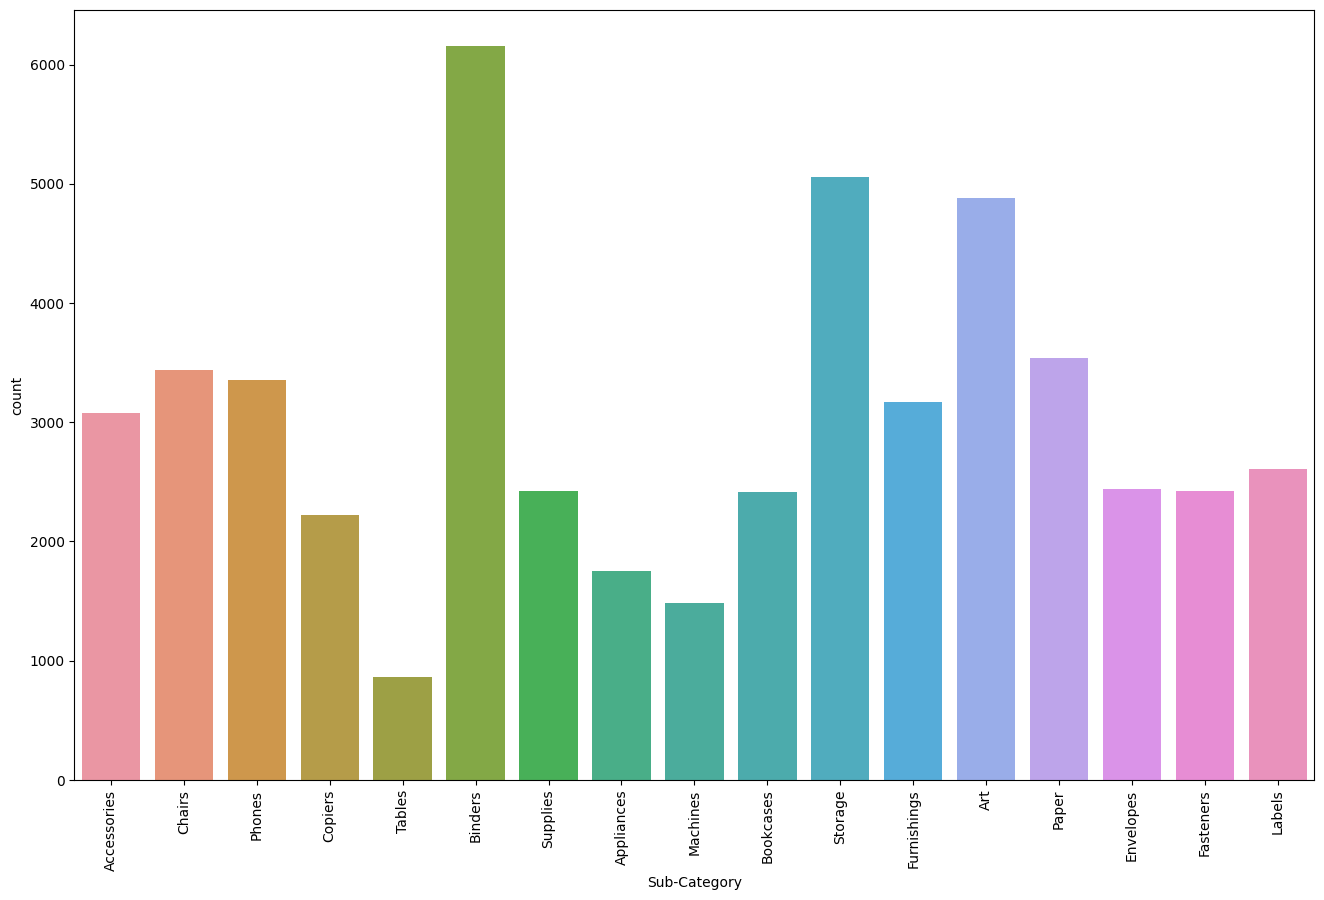

In [ ]:
# Visualizing the Sub Category
plt.figure(figsize = (16,10))
ax = sns.countplot(x='Sub-Category',data=store)
plt.xticks(rotation=90)
plt.show()

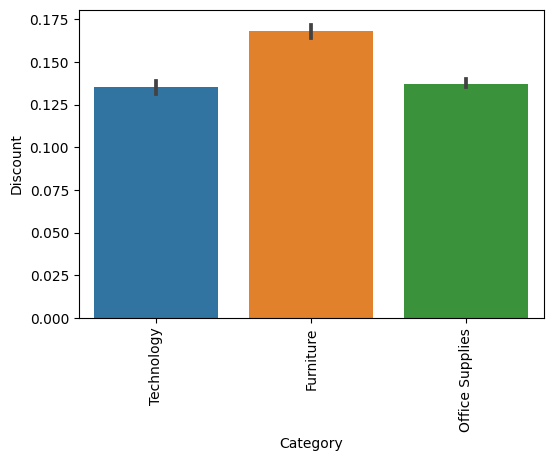

In [ ]:
# Visualizing the Category vs discount
plt.figure(figsize = (6,4))
sns.barplot(data=store,x='Category',y='Discount')
plt.xticks(rotation = 90)
plt.show()

<Figure size 1000x1500 with 0 Axes>

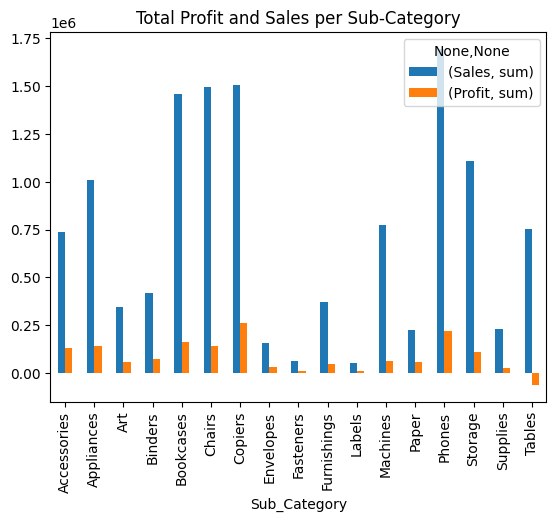

In [ ]:
# Visualizing the Sales and Profit
plt.figure(figsize=(10,15))
Profit_Sales.agg(['sum']).plot.bar()
plt.title('Total Profit and Sales per Sub-Category')
plt.show()